1 задача

In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim


# отредактируем все наши фотографии(одинаковый размер и свойства)
transform = transforms.Compose([transforms.ToTensor(), 
                               transforms.Normalize((0.5), (0.5))
])

# dataset = datasets.MNIST('mnist', train=False, download=True,
#         transform=transforms.ToTensor())

trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

input_size = 28*28
hidden_size = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_size[0]),
                     nn.ReLU(),
                     nn.Linear(hidden_size[0], hidden_size[1]),
                     nn.ReLU(),
                     nn.Linear(hidden_size[1], output_size),
                     nn.LogSoftmax(dim=1))


criterion = nn.NLLLoss()
# images - картинка в числовом виде, labels - само число на картинке
images, labels = next(iter(trainloader))


optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15

for i in range(epochs):
    running_loss = 0
    for images, labels in trainloader:

        images = images.view(images.shape[0], -1)

        # градиенты все оптимизированных
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #обратное распределение
        loss.backward()
        
        #оптимизация
        optimizer.step()
        
        running_loss += loss.item()
    else:
        # print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
        print("\nTraining Time (in minutes) =",(time()-time0)/60)
   
true_count, count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    # показатель степени элементов
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(pred_label == true_label):
      true_count += 1
    count += 1

print("Number Of Images Tested =", count)
print("\nModel Accuracy =", (true_count/count))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/train-images-idx3-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/train-labels-idx1-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting PATH_TO_STORE_TESTSET/MNIST/raw/train-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting PATH_TO_STORE_TESTSET/MNIST/raw/train-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting PATH_TO_STORE_TESTSET/MNIST/raw/t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting PATH_TO_STORE_TESTSET/MNIST/raw/t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw


Training Time (in minutes) = 0.23691288630167642

Training Time (in minutes) = 0.3958653966585795

Training Time (in minutes) = 0.5543798446655274

Training Time (in minutes) = 0.7133768439292908

Training Time (in minutes) = 0.8720134059588115

Training Time (in minutes) = 1.0300711353619894

Training Time (in minutes) = 1.188095541795095

Training Time (in minutes) = 1.3465469876925151

Training Time (in minutes) = 1.5148423115412395

Training Time (in minutes) = 1.6774303038915

Training Time (in minutes) = 1.8367249806722006

Training Time (in minutes) = 1.9946967045466104

Training Time (in minutes) = 2.1526943246523538

Training Time (in minutes) = 2.3111892183621725

Training Time (in minutes) = 2.4692931016286215
Number Of Images Tested = 10000

Model Accuracy = 0.9751


2 задача


In [2]:
import plotly.express as px
import numpy as np
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.encode = nn.Sequential(
            nn.Dropout(p=0.6),
            nn.Linear(28*28, 300),
            nn.ReLU(),  
            nn.Linear(300, 2),
            nn.ReLU(),
            nn.LogSoftmax(dim=1)
            # nn.Sigmoid()
            # мы хотим перевести картинку в какое-нибудь X-мерное пространство
        )
        self.decode = nn.Sequential(

            nn.Linear(2, 300),
            nn.ReLU(), 
            nn.Linear(300, 28*28),
            nn.LogSoftmax(dim=1)

            # nn.LogSoftmax(dim=1)
            # а теперь наоборот - из Х-мерного в картинку
            # nn.Sigmoid()
            # картинки -- это тензоры со значениями от 0 до 1
            # нет особого смысла выводить что-то не из этого промежутка
        )
    def encode_(self, x):
        return self.encode(x)

    def forward(self, x):
        return self.decode(self.encode(x))


model = Autoencoder()
criterion = torch.nn.MSELoss()
#                    ^ попробуйте также другие меры разности (например, абсолютную ошибку)
optimizer = torch.optim.Adam(model.parameters())

##########

def get_loader(train, batch_size):
    '''Cкачает мнист и сохранит где-то рядом.'''
    
    # Dataset в PyTorch -- это какой-то объект, который оборачивает сырые данные и делает с ними какой-нибудь препроцессинг
    dataset = datasets.MNIST('mnist', train=train, download=True,
        transform=transforms.ToTensor())
    
    # DataLoader делает из датасета генератор, который возвращает данные, сгруппированные по батчам
    loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
    
    return loader
    
train = get_loader(True, 2000)
val = get_loader(False, 2000)

##########

y_train = []
for epoch in range(10):
    train_loss = 0
    for data, y in train:
        #     ^ лэйблы нам не нужны
        data = data.view(-1, 784)
        
        optimizer.zero_grad()
        
        
        reconstructed = model.forward(data)
        loss = criterion(data, reconstructed)
        
        loss.backward()

        train_loss += loss.item()
        ### Происходит градиентный шаг
        optimizer.step()
        y_train.append(y)

    print('epoch %d, loss %.4f' % (epoch, train_loss / len(train)))
    ####
encode_data = model.encode_(data)
encode_data.shape
    ####




  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting mnist/MNIST/raw/train-images-idx3-ubyte.gz to mnist/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting mnist/MNIST/raw/train-labels-idx1-ubyte.gz to mnist/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist/MNIST/raw

epoch 0, loss 46.3178
epoch 1, loss 46.2660
epoch 2, loss 46.2645
epoch 3, loss 46.2644
epoch 4, loss 46.2644
epoch 5, loss 46.2644
epoch 6, loss 46.2644
epoch 7, loss 46.2644
epoch 8, loss 46.2644
epoch 9, loss 46.2644


torch.Size([2000, 2])

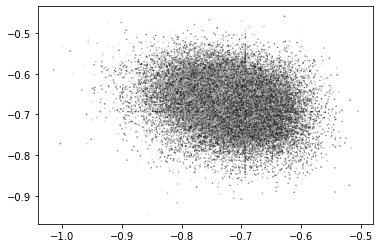

In [6]:
model2 = Autoencoder()
criterion2 = torch.nn.MSELoss()
#                    ^ попробуйте также другие меры разности (например, абсолютную ошибку)
optimizer2 = torch.optim.Adam(model2.parameters())

train_loss = 0
x = []
y = []
colors = []
for data, ans in train:
    data = data.view(-1, 784)
    for i in range(len(ans)):
        x = x + [float(model2.encode(data)[i, 0])]
        y = y + [float(model2.encode(data)[i, 1])]
        colors += [str(int(ans[i])/10)]
plt.scatter(x, y, c=colors, s=0.1)
plt.show()

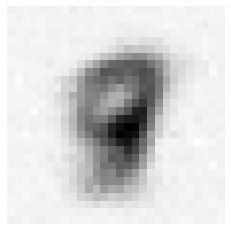

In [ ]:
from matplotlib import animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display
def get(x):
    return train.dataset[x][0].view(1, 784)

def imshow(img):
    pic = img.numpy().astype('float')
    plt.axis('off')
    return plt.imshow(pic, cmap='Greys', animated=True)

def morph(inputs, steps, delay):
    # перегоняем в латентное пространство все картинки на входе
    latent = [model.encode(get(k)).data for k in inputs]
    fig = plt.figure()
    images = []
    for a, b in zip(latent, latent[1:] + [latent[0]]):
        for t in np.linspace(0, 1, steps):
            # получаем проинтерполированную точку
            c = a*(1-t)+b*t
            # ...и декодируем её в изображение
            morphed = model.decode(c).data
            morphed = morphed.view(28, 28)
            images.append([imshow(morphed)])
    
    ani = animation.ArtistAnimation(fig, images, interval=delay)

    display(HTML(ani.to_html5_video()))

morph(np.random.randint(0, len(train.dataset), 30), 20, 30)


3 задача

0.11236666666666667 0.1135
0.11236666666666667 0.1135
0.11236666666666667 0.1135
0.0993 0.1032
0.11236666666666667 0.1135
0.11236666666666667 0.1135
0.11236666666666667 0.1135
0.11236666666666667 0.1135
0.09915 0.1009
0.11236666666666667 0.1135


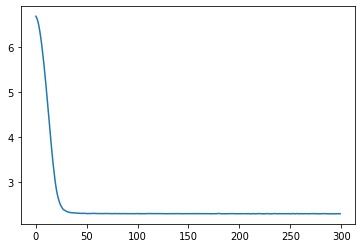

In [ ]:
train = get_loader(True, 2000)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)
criterion = nn.NLLLoss()
##########
def accuracy(model, val):
    total = 0
    correct = 0
    for X, y in val:
        X = X.view(-1, 784)
        res = model(X)
        res = res.argmax(dim=1)
        total += res.shape[0]
        correct += (res == y).sum().item()
    return correct / total
accuracy(model, train)

train_losses = []
for epoch in range(10):
    for X, y in train:
        X = X.view(-1, 784)  # разгладим картинку в вектор
        
        optimizer.zero_grad()
        
        output = model(X)
        loss = criterion(output, y)
        loss.backward()
        train_losses.append(loss.item())
        optimizer.step()
    
    print(accuracy(model, train), accuracy(model, val))
        
plt.plot(train_losses)
plt.show()